<a href="https://colab.research.google.com/github/NidhiSingh25901/AICopilot/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
print(plt.style.available)
plt.style.use("seaborn-v0_8-dark")

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'petroff10', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [ ]:
def generateDataSet(m):
  m = 100
  x = np.random.randn(m) * 10
  noise = np.random.rand(m)
  print(noise)
  print(x)
  y = 3*x+ 4* noise
  plt.scatter(x,y)
  plt.show()
  return x, y

In [ ]:
y.shape

(100,)

[0.52116258 0.91069656 0.97789047 0.42909048 0.25810638 0.54513231
 0.96460252 0.84365307 0.38829421 0.86083875 0.51889955 0.61317915
 0.90270321 0.87087551 0.27214771 0.93860314 0.07289763 0.57319098
 0.2332045  0.4763599  0.64752385 0.73593107 0.84427987 0.65705385
 0.04738165 0.78960668 0.95349216 0.96240012 0.80772029 0.32863788
 0.73974252 0.19218757 0.37651241 0.63905827 0.24068792 0.7665769
 0.21473068 0.83010139 0.30019438 0.551535   0.52001613 0.82900537
 0.61619777 0.01222369 0.97988757 0.06364737 0.94338694 0.99012499
 0.2868064  0.40149259 0.56989595 0.80367765 0.49222142 0.15751393
 0.18981655 0.08966203 0.97330374 0.51411236 0.85160202 0.29843084
 0.35264701 0.5947011  0.72427437 0.39709146 0.79042925 0.03356958
 0.45083129 0.0673574  0.38413302 0.07003145 0.33061284 0.44457637
 0.80203195 0.04929994 0.40669386 0.83197499 0.2154893  0.71127059
 0.72877345 0.92116469 0.00404022 0.19448629 0.20238724 0.21458975
 0.48310084 0.81416009 0.11147867 0.06112263 0.4877436  0.00176

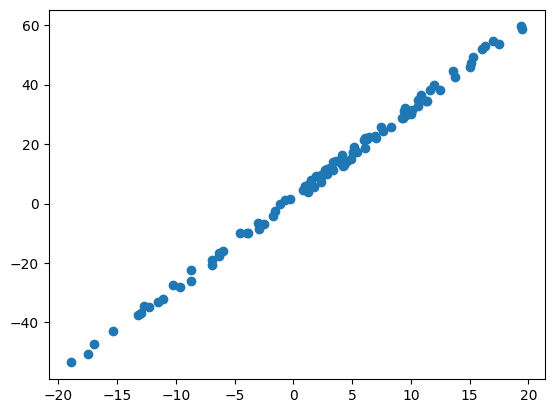

(100,) (100,)


In [ ]:
x,y = generateDataSet(100)
print(x.shape, y.shape)

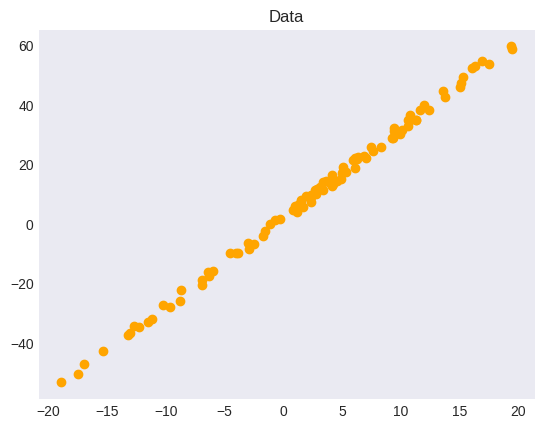

In [ ]:
def plotData(x,y,color="orange", title="Data"):
  plt.title(title)
  plt.xlabel("x")
  plt.yabel("")
  plt.scatter(x,y,c=color)
  plt.show()

plotData(x,y)

In [ ]:
print(x.mean(), x.std())

2.7935160380199044 8.683407181653655


In [ ]:
def normalize(x):
  x=(x-x.mean())/x.std()
  return x

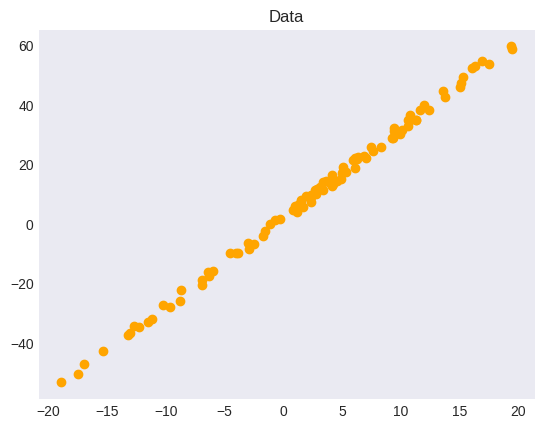

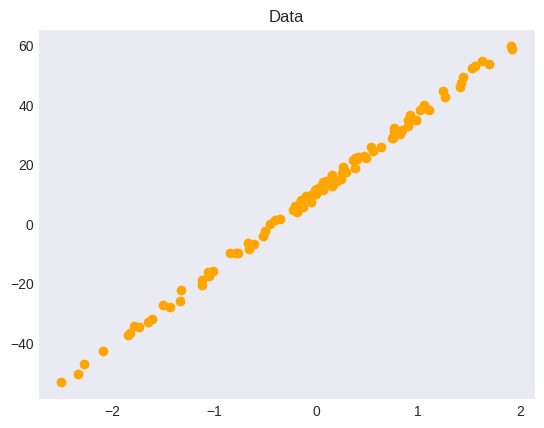

In [ ]:
plotData(x,y)
x= normalize(x)
plotData(x,y)

In [ ]:
x.mean()
x.std()

np.float64(1.0)

In [ ]:
def trainTestSplit(x,y, split=0.8):
  m = x.shape[0]
  data = np.zeros((m,2))
  data[:,0] = x
  data[:,1] = y
  np.random.shuffle(data)
  split = int(m * split)
  XT = data[:split,0]
  YT = data[:split,1]
  XTest = data[split:,0]
  YTest = data[split:,1]
  return XT, YT, XTest, YTest


In [ ]:
xT, yT, XTest, YTest = trainTestSplit(x,y)
print(xT.shape, yT.shape, XTest.shape, YTest.shape)

(80,) (80,) (20,) (20,)


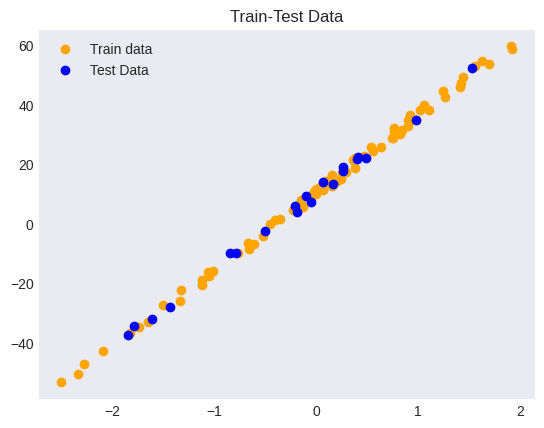

In [ ]:
plt.scatter(xT,yT, color="orange", label="Train data")
plt.scatter(XTest,YTest, color="blue", label="Test Data")
plt.title("Train-Test Data")
plt.legend()
plt.show()

In [ ]:
def hypothesis(x, theta):
  return np.dot(x, theta)

In [ ]:
def hypothesis(x, theta):
  return theta[0] + theta[1]*x

def error(x,y, theta):
  m = x.shape[0]
  e=0
  for i in range(m):
    y_i = hypothesis(x[i], theta)
    e += (y[i] - y_i)**2
  return e/2*m

def gradient(x,y,theta):
  m = x.shape[0]
  grad = np.zeros((2,))

  for i in range(m):
    exp = hypothesis(x[i], theta) - y[i]
    grad[0]+=(exp)
    grad[1]+=(exp)*x[i]

  return grad/m

def train(x,y, learning_rate = 0.01):
  theta = np.zeros((2,))
  maxItra = 100
  error_list = []
  for i in range(maxItra):
    grad = gradient(x,y,theta)
    error_list.append(error(x,y,theta))
    theta[0] = theta[0] - learning_rate * grad[0]
    theta[1] = theta[1] - learning_rate * grad[1]
  plt.plot(error_list)
  return theta

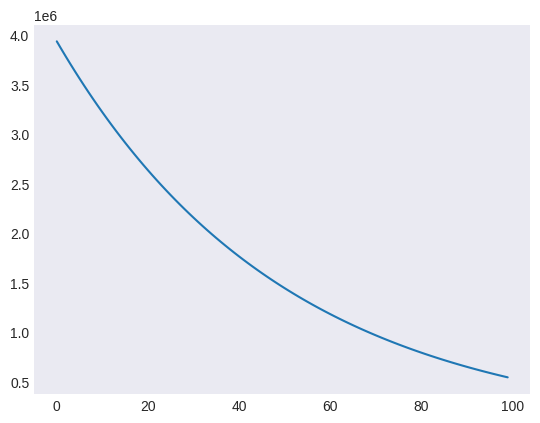

In [ ]:
theta = train(x,y)

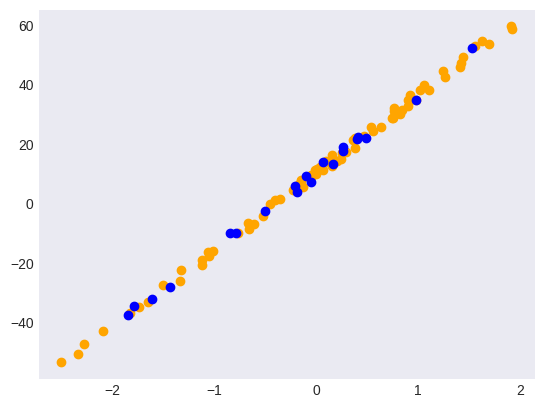

In [ ]:
plt.scatter(xT, yT, color="orange", label="Train Data")
plt.scatter(XTest, YTest, color="blue", label="Test Data")
plt.show()

In [ ]:
def predict(x, theta):
  return hypothesis(x,theta)

In [ ]:
yp = predict(xT, theta)

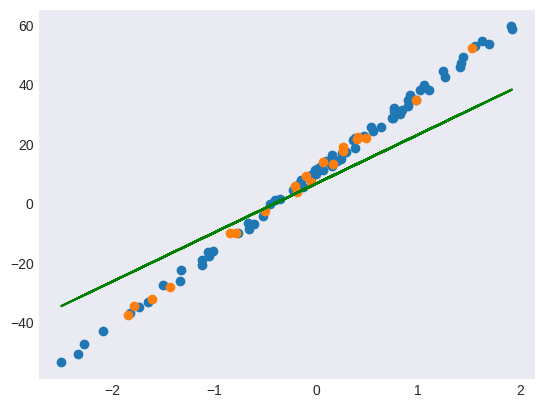

In [ ]:
plt.scatter(xT, yT)
plt.scatter(XTest, YTest)
plt.plot(xT, yp, color="green")
plt.show()